<a id="Chapitre-2"></a>

<a id="Chapter 2"></a>

<a id="Chapter-2"></a>

## Welcome to the SolPOC Notebook !
### In a way to pick up the software, we propose you to learn and test the key features in a way to be familiar with the software before usage.<br>

# Chapter 2 : Materials

We've just seen in chapter 1 how to calculate easily R, T, A parameters. But we chose some random values that can't be randomly chosen in a real optic problem. Let's see how the software is managing the different materials.

In the program, the materials parameters that we need are the n (real part of his refractive index) and the k (complex part of his refractive index). For a lot of materials, these values exist for a large of wavelengths thanks to researches of some researchers in the world. This values are multiple but present in a dedicated folder called Materials. The douments format is precise, and ahs to be always the same, 1st column are the wavelengths, 2nd one the n(s) and 3rd one, the k(s). <br>
The problem is that when we want to solve a poroblem with SolPOC, we may want to solve it at some wavelenths that are not exactly the same as those the researchers made experiences. That's why we made the Made_Stack() function. <br>
Made_Stack() takes the different materials and wavelengths of the problem. <br>
--> Made_Stack() is calling the open_material() function which is opening the txt file of each material in a way to take the values of research we just discussed about before.

In [1]:
run functions_COPS.py

The code is going to read the materials properties (Zno here) placed in the '/Materials' folder : 

In [2]:
Wl_mat, n_mat, k_mat = open_material('ZnO')
print('Wl = ', Wl_mat)
print('n = ', n_mat)
print('k = ', k_mat)

Wl =  [ 450.   485.5  521.   556.5  592.   627.5  663.   698.5  734.   769.5
  805.   840.5  876.   911.5  947.   982.5 1018.  1054.  1089.  1125.
 1160.  1196.  1231.  1267.  1302.  1338.  1373.  1409.  1444.  1480.
 1515.  1551.  1586.  1622.  1657.  1693.  1728.  1764.  1799.  1835.
 1870.  1906.  1941.  1977.  2012.  2048.  2083.  2119.  2154.  2190.
 2225.  2261.  2296.  2332.  2367.  2403.  2438.  2474.  2509.  2545.
 2580.  2616.  2651.  2687.  2722.  2758.  2793.  2829.  2864.  2900.
 2935.  2971.  3006.  3042.  3077.  3113.  3148.  3184.  3219.  3255.
 3290.  3326.  3361.  3397.  3432.  3468.  3503.  3539.  3574.  3610.
 3645.  3681.  3716.  3752.  3787.  3823.  3858.  3894.  3929.  3965.
 4000. ]
n =  [2.10539912 2.06415918 2.03640466 2.01656202 2.00174318 1.99030341
 1.98123843 1.97390116 1.9678565  1.9628015  1.95851905 1.95484967
 1.9516738  1.94890011 1.94645772 1.9442909  1.94235522 1.94059162
 1.93904078 1.93758973 1.93629968 1.93508009 1.93398512 1.93294024
 1.9319937 

Here is an example of a txt file with the wavelengths in the first array (first column of the txt), the n(s) in the second and ths k(s) i the third.

After opening the material txt, the function need to find the values of n and k at the target wavelengths. For that, Made_Stack() uses an interpolation method (interpolate_with_extrapolation() function) which calculates for each wavelength in Wl a value of n and k. Let's tke the same Wl as the first chapter and test :

In [3]:
Wl = np.arange(600, 1100, 100)
n = interpolate_with_extrapolation(Wl, Wl_mat, n_mat)
k = interpolate_with_extrapolation(Wl, Wl_mat, k_mat)
print(Wl)
print(n)
print(k)

[ 600  700  800  900 1000]
[1.99916521 1.97364575 1.95912221 1.94979863 1.94333669]
[0. 0. 0. 0. 0.]


Here is an example of the interpolation process :

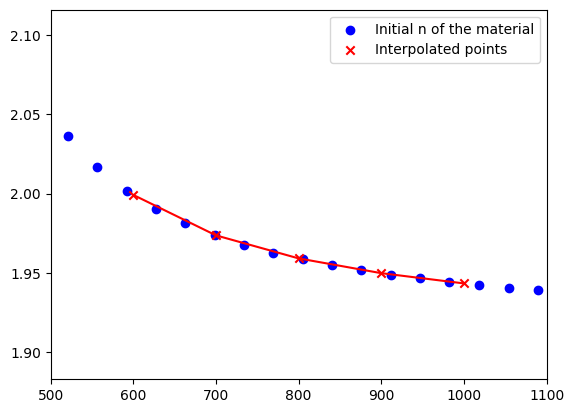

In [5]:
fig, ax = plt.subplots()
plt.scatter(Wl_mat, n_mat, color='blue', marker='o', label='Initial n of the material')
plt.plot(Wl, n, color='red')
plt.scatter(Wl, n, color='red', marker='x', label='Interpolated points')
ax.set_xlim(500, 1100)
plt.legend()
plt.show()

This is a nice way to understand how the interpolation works. We can see the red points who are aporximated results at the wavelengths wanted matching the blue curve.

For every wavelength of our problem, we now have an the real and the complex part of the refractive index ! We now put these values into variables respectively called n_Stack and k_Stack which take the n and k of all the materials of the stack which will be useful in all the program !

Notice that Made_Stack() takes a Stack called Mat_Stack in parameters, not just a material. In fact, the difference is that a single material is a String (ex : 'SiO2') and Mat_Stack is a list (ex : ['SiO2', 'Al', 'Ag']).

In [6]:
Made_Stack('BK7','MgF2', Wl)

TypeError: Made_Stack() takes 2 positional arguments but 3 were given

In [7]:
This is the correct way to use Made_Stack() function  :

SyntaxError: invalid syntax (1457737241.py, line 1)

In [8]:
Made_Stack(['BK7', 'MgF2'], Wl)

(array([[1.5163    , 1.37752149],
        [1.5131    , 1.37608318],
        [1.5108    , 1.3750562 ],
        [1.509     , 1.37425762],
        [1.5075    , 1.37358428]]),
 array([[2.6413e-08, 0.0000e+00],
        [2.2326e-08, 0.0000e+00],
        [2.3164e-08, 0.0000e+00],
        [2.4003e-08, 0.0000e+00],
        [2.4841e-08, 0.0000e+00]]))

As we said, Made_Stack() makes an error if we call it with a material but if we call it with a list of a Stack (even a Stack of one material) that gives us the n_Stack and the k_Stack as we wanted !

[Chapter 3](SolPOC_Chapter_3.ipynb)